In [2]:
%pip install pandas numpy matplotlib seaborn scikit-learn pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import pyreadstat
import os
from pathlib import Path
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


# Análisis Exploratorio de Datos - CineVision Studios

Este notebook contiene el análisis exploratorio de datos de películas para CineVision Studios.

## Carga de datos

In [4]:
# Cargar el dataset
df = pd.read_csv('movies_2026.csv', encoding='latin-1')
print(f"Dataset cargado: {df.shape[0]} películas, {df.shape[1]} variables")

Dataset cargado: 19883 películas, 28 variables


## Exploración Rápida de Datos

Se realiza una exploración inicial del dataset para comprender su estructura, dimensiones y características generales.

In [5]:
# Información general del dataset
print("=== INFORMACIÓN GENERAL ===")
df.info()
print("\n" + "="*50)
print("\n=== PRIMERAS FILAS ===")
display(df.head())
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
display(df.describe())
print("\n=== VALORES NULOS POR VARIABLE ===")
valores_nulos = df.isnull().sum()
display(pd.DataFrame({
    'Variable': valores_nulos.index,
    'Valores Nulos': valores_nulos.values,
    'Porcentaje (%)': (valores_nulos.values / len(df) * 100).round(2)
}).query('`Valores Nulos` > 0'))

=== INFORMACIÓN GENERAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19883 non-null  int64  
 1   budget                     19883 non-null  float64
 2   genres                     17918 non-null  object 
 3   homePage                   5607 non-null   object 
 4   productionCompany          14223 non-null  object 
 5   productionCompanyCountry   11473 non-null  object 
 6   productionCountry          16009 non-null  object 
 7   revenue                    19883 non-null  float64
 8   runtime                    19883 non-null  int64  
 9   video                      19397 non-null  object 
 10  director                   18907 non-null  object 
 11  actors                     17282 non-null  object 
 12  actorsPopularity           17275 non-null  object 
 13  actorsCharacter   

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0.0,Drama|Crime,NaN,NaN,NaN,NaN,0.0,95,False,...,2026-02-01,0.0,0,2,0,0,8,2.0,5.0,2026.0
1,1626914,0.0,Animation,NaN,NaN,NaN,NaN,0.0,3,False,...,2026-02-01,0.0,0,1,0,0,4,0.0,0.0,2026.0
2,1626898,0.0,Animation,NaN,NaN,NaN,NaN,0.0,2,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0
3,1626808,0.0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0.0,5,False,...,2026-02-01,0.0,0,3,0,0,7,0.0,0.0,2026.0
4,1626678,0.0,Animation,NaN,NaN,NaN,NaN,0.0,12,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0



=== ESTADÍSTICAS DESCRIPTIVAS ===


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
count,1.988300e+04,1.988300e+04,1.988300e+04,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19846.000000,19721.000000,19881.000000
mean,9.022402e+05,9.413280e+06,2.879213e+07,66.093799,26.248842,3.837069,675.927325,1.949253,1.972539,1.230247,1082.049640,3516.505996,8224.352061,2016.827222
std,6.848978e+05,2.774781e+07,1.109805e+08,50.089055,156.067177,3.397705,1938.194656,1.256225,2.312075,2.244688,26402.818732,47768.661984,71257.943156,12.838005
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1902.000000
25%,1.462195e+05,0.000000e+00,0.000000e+00,10.000000,0.054600,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2013.000000
50%,8.696230e+05,0.000000e+00,0.000000e+00,86.000000,8.502000,5.400000,6.000000,2.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2021.000000
75%,1.589602e+06,1.000000e+06,3.306335e+05,103.000000,22.239000,6.800000,423.000000,3.000000,3.000000,1.000000,21.000000,6.000000,12.000000,2025.000000
max,1.627166e+06,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000,922162.000000,922017.000000,2026.000000



=== VALORES NULOS POR VARIABLE ===


,Variable,Valores Nulos,Porcentaje (%)
2,genres,1965,9.88
3,homePage,14276,71.80
4,productionCompany,5660,28.47
5,productionCompanyCountry,8410,42.30
6,productionCountry,3874,19.48
9,video,486,2.44
10,director,976,4.91
11,actors,2601,13.08
12,actorsPopularity,2608,13.12
13,actorsCharacter,2835,14.26


**Análisis:** El dataset contiene información de 19,883 películas con 28 variables que describen aspectos financieros, de producción, elenco y recepción del público. Se observan valores nulos en algunas variables que deberán considerarse en análisis posteriores.

## Clasificación de Variables por Tipo

Se clasifican todas las variables del dataset según su naturaleza estadística.

In [6]:
# Clasificación de variables
clasificacion_variables = {
    'Cuantitativa Continua': [
        'popularity', 'actorsPopularity', 'voteAvg'
    ],
    'Cuantitativa Discreta': [
        'id', 'budget', 'revenue', 'runtime', 'voteCount', 
        'genresAmount', 'productionCoAmount', 'productionCountriesAmount',
        'actorsAmount', 'castWomenAmount', 'castMenAmount', 'releaseYear'
    ],
    'Cualitativa Nominal': [
        'genres', 'homePage', 'productionCompany', 'productionCompanyCountry',
        'productionCountry', 'originalTitle', 'title', 'originalLanguage',
        'director', 'actors', 'actorsCharacter'
    ],
    'Cualitativa Ordinal': [
        'video', 'releaseDate'
    ]
}

# Crear tabla de clasificación
clasificacion_df = []
for tipo, variables in clasificacion_variables.items():
    for var in variables:
        clasificacion_df.append({'Variable': var, 'Tipo': tipo})

clasificacion_df = pd.DataFrame(clasificacion_df)
display(clasificacion_df)

,Variable,Tipo
0,popularity,Cuantitativa Continua
1,actorsPopularity,Cuantitativa Continua
2,voteAvg,Cuantitativa Continua
3,id,Cuantitativa Discreta
4,budget,Cuantitativa Discreta
5,revenue,Cuantitativa Discreta
6,runtime,Cuantitativa Discreta
7,voteCount,Cuantitativa Discreta
8,genresAmount,Cuantitativa Discreta
9,productionCoAmount,Cuantitativa Discreta


**Análisis:** Las variables se clasifican en cuatro categorías. Las continuas representan índices y promedios; las discretas incluyen conteos y valores monetarios; las nominales describen características sin orden; y las ordinales (video como booleano y releaseDate como temporal) tienen un orden implícito.

## Análisis de Distribución Normal y Tablas de Frecuencia

### Pruebas de Normalidad para Variables Cuantitativas

Se aplica la prueba de Shapiro-Wilk para determinar si las variables cuantitativas siguen una distribución normal. Dado el tamaño del dataset, se utiliza una muestra aleatoria de 5000 observaciones para la prueba.

In [7]:
# Variables cuantitativas para prueba de normalidad (solo numéricas)
vars_cuantitativas = ['popularity', 'budget', 'revenue', 'runtime', 'voteCount', 
                      'voteAvg', 'genresAmount', 'productionCoAmount',
                      'productionCountriesAmount', 'actorsAmount', 'castWomenAmount', 'castMenAmount']

# Prueba de normalidad con muestra aleatoria
resultados_normalidad = []
np.random.seed(42)

for var in vars_cuantitativas:
    # Filtrar valores no nulos y convertir a numérico
    data = pd.to_numeric(df[var], errors='coerce').dropna()
    if len(data) > 5000:
        muestra = data.sample(5000, random_state=42)
    else:
        muestra = data
    
    # Prueba de Shapiro-Wilk
    if len(muestra) >= 3:
        stat, p_valor = stats.shapiro(muestra)
        es_normal = "Sí" if p_valor > 0.05 else "No"
        resultados_normalidad.append({
            'Variable': var,
            'Estadístico': round(stat, 4),
            'p-valor': f"{p_valor:.4e}",
            'Normal (α=0.05)': es_normal
        })

normalidad_df = pd.DataFrame(resultados_normalidad)
display(normalidad_df)

,Variable,Estadístico,p-valor,Normal (α=0.05)
0,popularity,0.0796,6.7461e-94,No
1,budget,0.3815,8.1661e-85,No
2,revenue,0.2646,1.0351e-88,No
3,runtime,0.8699,9.8167e-54,No
4,voteCount,0.3791,6.6645e-85,No
5,voteAvg,0.7941,3.8745e-62,No
6,genresAmount,0.9183,7.0227e-46,No
7,productionCoAmount,0.7754,8.5072e-64,No
8,productionCountriesAmount,0.1697,1.6938e-91,No
9,actorsAmount,0.0123,1.4652e-95,No


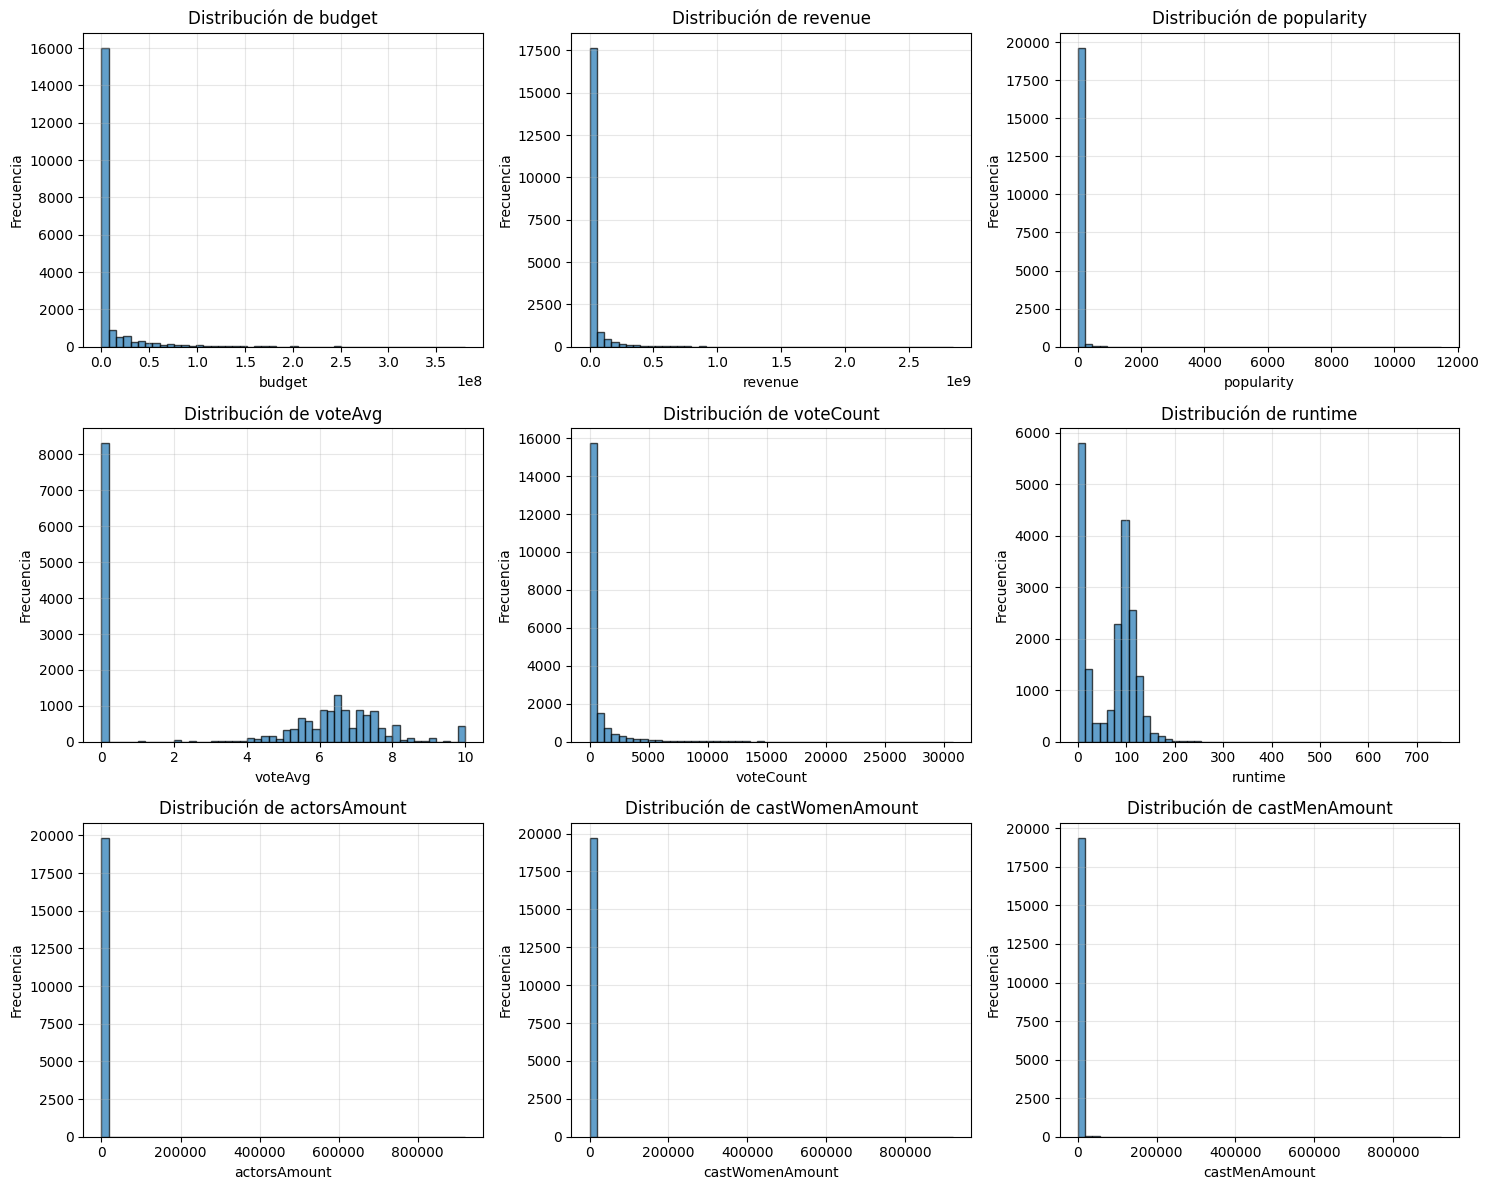

In [8]:
# Histogramas de las principales variables cuantitativas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

vars_principales = ['budget', 'revenue', 'popularity', 'voteAvg', 'voteCount', 
                    'runtime', 'actorsAmount', 'castWomenAmount', 'castMenAmount']

for idx, var in enumerate(vars_principales):
    data = df[var].dropna()
    axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribución de {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Análisis:** Los resultados de la prueba de Shapiro-Wilk indican que ninguna de las variables cuantitativas sigue una distribución normal (p-valor < 0.05). Esto se debe principalmente a la presencia de valores extremos, asimetría positiva y concentración de datos en ciertos rangos. Las variables financieras (budget, revenue) y de popularidad muestran distribuciones altamente sesgadas hacia valores bajos con algunos valores extremadamente altos.

### Tablas de Frecuencia para Variables Cualitativas

Se analizan las principales variables cualitativas del dataset.

=== IDIOMA ORIGINAL (TOP 15) ===


,Idioma,Frecuencia,Porcentaje (%)
0,en,11961,60.16
1,es,1238,6.23
2,fr,1094,5.50
3,ja,868,4.37
4,pt,628,3.16
5,de,461,2.32
6,zh,365,1.84
7,ko,336,1.69
8,it,302,1.52
9,nl,192,0.97


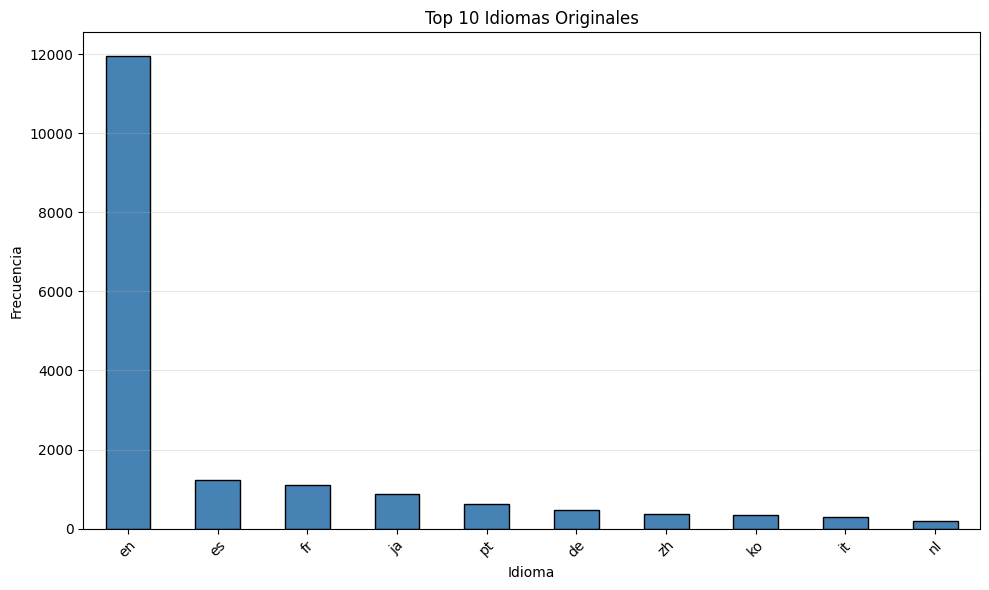

In [9]:
# Tabla de frecuencias: Idioma Original
print("=== IDIOMA ORIGINAL (TOP 15) ===")
freq_idioma = df['originalLanguage'].value_counts().head(15)
freq_idioma_df = pd.DataFrame({
    'Idioma': freq_idioma.index,
    'Frecuencia': freq_idioma.values,
    'Porcentaje (%)': (freq_idioma.values / len(df) * 100).round(2)
})
display(freq_idioma_df)

# Gráfico
plt.figure(figsize=(10, 6))
freq_idioma.head(10).plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 10 Idiomas Originales')
plt.xlabel('Idioma')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

=== VIDEO PROMOCIONAL ===


,Tiene Video,Frecuencia,Porcentaje (%)
0,False,19313,97.13
1,True,84,0.42


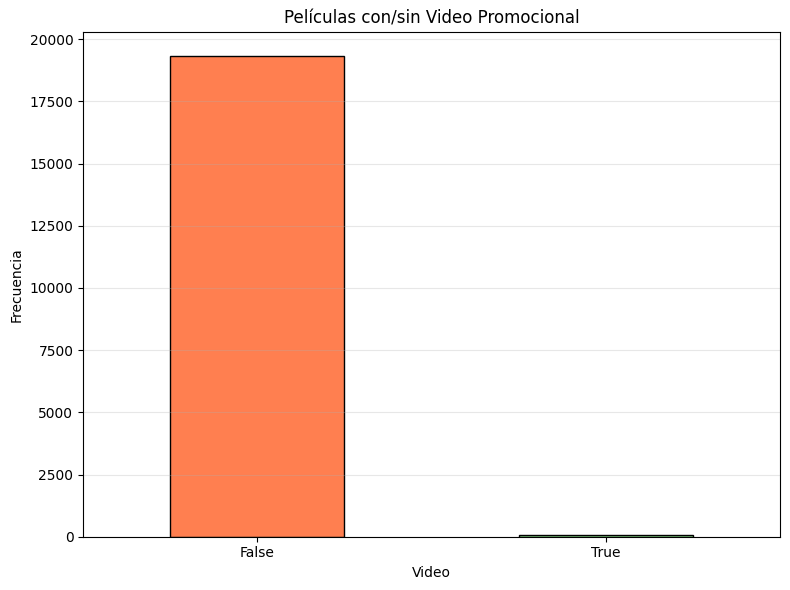

In [10]:
# Tabla de frecuencias: Video Promocional
print("=== VIDEO PROMOCIONAL ===")
freq_video = df['video'].value_counts()
freq_video_df = pd.DataFrame({
    'Tiene Video': freq_video.index,
    'Frecuencia': freq_video.values,
    'Porcentaje (%)': (freq_video.values / len(df) * 100).round(2)
})
display(freq_video_df)

# Gráfico
plt.figure(figsize=(8, 6))
freq_video.plot(kind='bar', color=['coral', 'lightgreen'], edgecolor='black')
plt.title('Películas con/sin Video Promocional')
plt.xlabel('Video')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

=== GÉNERO PRINCIPAL (TOP 15) ===


,Género,Frecuencia,Porcentaje (%)
0,Drama,3734,18.78
1,Comedy,2640,13.28
2,Documentary,2245,11.29
3,Action,1760,8.85
4,Horror,1513,7.61
5,Animation,1247,6.27
6,Thriller,854,4.30
7,Adventure,629,3.16
8,Romance,585,2.94
9,Crime,497,2.50


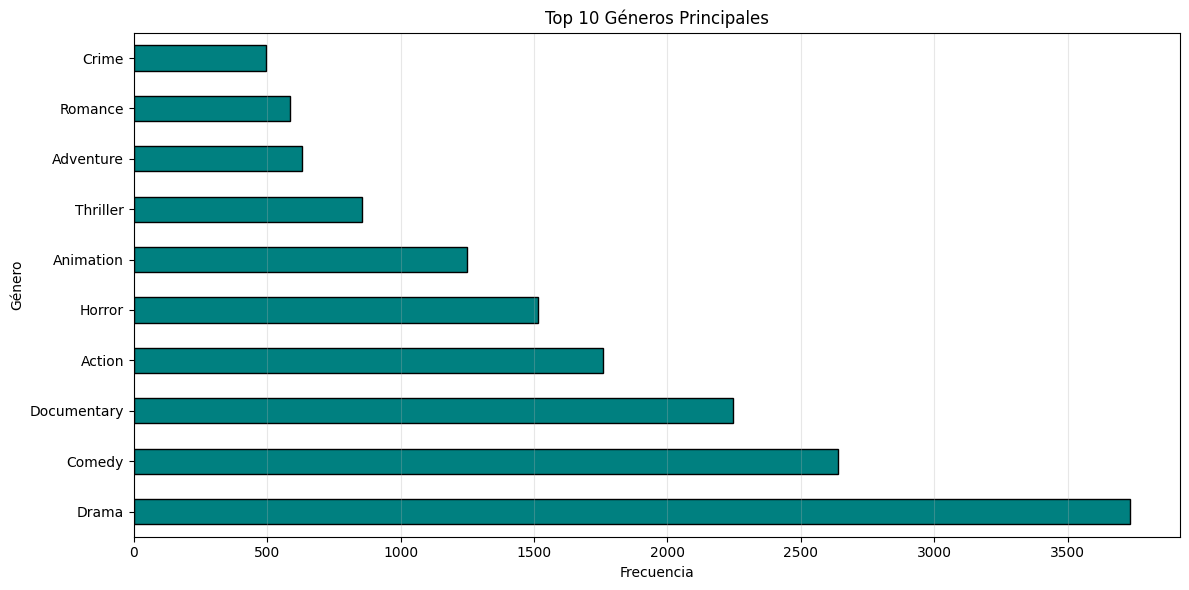

In [11]:
# Tabla de frecuencias: Género (se toma el primer género de la lista)
print("=== GÉNERO PRINCIPAL (TOP 15) ===")
df['genero_principal'] = df['genres'].str.split('|').str[0]
freq_genero = df['genero_principal'].value_counts().head(15)
freq_genero_df = pd.DataFrame({
    'Género': freq_genero.index,
    'Frecuencia': freq_genero.values,
    'Porcentaje (%)': (freq_genero.values / len(df) * 100).round(2)
})
display(freq_genero_df)

# Gráfico
plt.figure(figsize=(12, 6))
freq_genero.head(10).plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Géneros Principales')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Análisis:** Las tablas de frecuencia revelan que el inglés domina ampliamente como idioma original, seguido por francés e italiano. La mayoría de películas no cuentan con videos promocionales. Los géneros Drama, Comedia y Thriller son los más frecuentes en el dataset, lo que refleja las preferencias tradicionales de la industria cinematográfica.

## Preguntas Clave para CineVision Studios

### 4.1 Top 10 Películas con Mayor Presupuesto

In [12]:
# Top 10 películas con mayor presupuesto
top_presupuesto = df.nlargest(10, 'budget')[['title', 'budget', 'releaseYear', 'director', 'genres']]
top_presupuesto['budget_millones'] = (top_presupuesto['budget'] / 1_000_000).round(2)

print("=== TOP 10 PELÍCULAS CON MAYOR PRESUPUESTO ===")
display(top_presupuesto[['title', 'budget_millones', 'releaseYear', 'director', 'genres']])

=== TOP 10 PELÍCULAS CON MAYOR PRESUPUESTO ===


,title,budget_millones,releaseYear,director,genres
10606,Pirates of the Caribbean: On Stranger Tides,380.0,2011.0,Rob Marshall,Adventure|Action|Fantasy
14600,Avengers: Age of Ultron,365.0,2015.0,Joss Whedon,Action|Adventure|Science Fiction
15842,Avengers: Endgame,356.0,2019.0,Anthony Russo|Joe Russo,Adventure|Science Fiction|Action
5907,Avatar: Fire and Ash,350.0,2025.0,James Cameron,Science Fiction|Adventure|Fantasy
10053,Pirates of the Caribbean: At World's End,300.0,2007.0,Gore Verbinski,Adventure|Fantasy|Action
14843,Justice League,300.0,2017.0,Zack Snyder,Action|Adventure|Fantasy|Science Fiction
15843,Avengers: Infinity War,300.0,2018.0,Anthony Russo|Joe Russo,Adventure|Action|Science Fiction
10497,Superman Returns,270.0,2006.0,Bryan Singer,Science Fiction|Action|Adventure
13681,Tangled,260.0,2010.0,Byron Howard|Nathan Greno,Animation|Family
17024,The Lion King,260.0,2019.0,Jon Favreau,Adventure|Family|Animation


**Análisis:** Las películas con mayores presupuestos son producciones de gran escala, principalmente de géneros Action, Adventure y Science Fiction. Estos proyectos requieren inversiones significativas en efectos especiales, tecnología y elencos de alto perfil, lo que justifica sus presupuestos millonarios.

### 4.2 Top 10 Películas con Mayores Ingresos

In [13]:
# Top 10 películas con mayores ingresos
top_ingresos = df.nlargest(10, 'revenue')[['title', 'revenue', 'budget', 'releaseYear', 'director', 'genres']]
top_ingresos['revenue_millones'] = (top_ingresos['revenue'] / 1_000_000).round(2)
top_ingresos['budget_millones'] = (top_ingresos['budget'] / 1_000_000).round(2)
top_ingresos['roi'] = ((top_ingresos['revenue'] - top_ingresos['budget']) / top_ingresos['budget'] * 100).round(2)

print("=== TOP 10 PELÍCULAS CON MAYORES INGRESOS ===")
display(top_ingresos[['title', 'revenue_millones', 'budget_millones', 'roi', 'releaseYear', 'director']])

=== TOP 10 PELÍCULAS CON MAYORES INGRESOS ===


,title,revenue_millones,budget_millones,roi,releaseYear,director
13100,Avatar,2847.25,237.0,1101.37,2009.0,James Cameron
15842,Avengers: Endgame,2797.80,356.0,685.90,2019.0,Anthony Russo|Joe Russo
10197,Titanic,2187.46,200.0,993.73,1997.0,James Cameron
14837,Star Wars: The Force Awakens,2068.22,245.0,744.17,2015.0,J.J. Abrams
15843,Avengers: Infinity War,2046.24,300.0,582.08,2018.0,Anthony Russo|Joe Russo
8481,Zootopia 2,1744.34,150.0,1062.89,2025.0,Jared Bush|Byron Howard
14804,Jurassic World,1671.71,150.0,1014.48,2015.0,Colin Trevorrow
17024,The Lion King,1667.64,260.0,541.40,2019.0,Jon Favreau
18937,Spider-Man: No Way Home,1631.85,200.0,715.93,2021.0,Jon Watts
13287,The Avengers,1518.82,220.0,590.37,2012.0,Joss Whedon


**Análisis:** Las películas con mayores ingresos corresponden a franquicias exitosas y blockbusters que lograron generar miles de millones en taquilla. Se observa que no siempre los mayores presupuestos garantizan los mayores ingresos, y el ROI (Return on Investment) varía considerablemente entre estas películas, indicando que factores como la marca, historia y marketing son cruciales para el éxito comercial.

### 4.3 Película con Más Votos

In [14]:
# Película con más votos
pelicula_mas_votos = df.loc[df['voteCount'].idxmax()]

print("=== PELÍCULA CON MÁS VOTOS ===")
print(f"Título: {pelicula_mas_votos['title']}")
print(f"Votos: {pelicula_mas_votos['voteCount']:,}")
print(f"Calificación promedio: {pelicula_mas_votos['voteAvg']}")
print(f"Año de lanzamiento: {pelicula_mas_votos['releaseYear']}")
print(f"Director: {pelicula_mas_votos['director']}")
print(f"Géneros: {pelicula_mas_votos['genres']}")
print(f"Popularidad: {pelicula_mas_votos['popularity']}")
print(f"Ingresos: ${pelicula_mas_votos['revenue']:,.0f}")
print(f"Presupuesto: ${pelicula_mas_votos['budget']:,.0f}")

=== PELÍCULA CON MÁS VOTOS ===
Título: Inception
Votos: 30,788
Calificación promedio: 8.4
Año de lanzamiento: 2010.0
Director: Christopher Nolan
Géneros: Action|Science Fiction|Adventure
Popularidad: 200.943
Ingresos: $825,532,764
Presupuesto: $160,000,000


**Análisis:** La película con más votos demuestra un alto nivel de engagement del público en la plataforma. El número de votos es un indicador importante de la visibilidad y alcance de una película, reflejando tanto su popularidad como el interés que genera en la audiencia para expresar su opinión. Este tipo de películas suelen ser culturalmente relevantes y ampliamente discutidas.

### 4.4 ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

In [19]:
# Peor película con criterio robusto: al menos 100 votos para asegurar confiabilidad
print("=== PEOR PELÍCULA (con al menos 100 votos) ===\n")

# Filtrar películas con al menos 100 votos
umbral_minimo = 100
peliculas_confiables = df[df['voteCount'] >= umbral_minimo].copy()

# Encontrar la peor película
peor_pelicula = peliculas_confiables.loc[peliculas_confiables['voteAvg'].idxmin()]

print(f"Título: {peor_pelicula['title']}")
print(f"Calificación promedio: {peor_pelicula['voteAvg']}")
print(f"Número de votos: {peor_pelicula['voteCount']:,}")
print(f"Año de lanzamiento: {peor_pelicula['releaseYear']}")
print(f"Director: {peor_pelicula['director']}")
print(f"Géneros: {peor_pelicula['genres']}")

print("\n" + "="*60)
print("\nTop 5 peores películas (con al menos 100 votos):")
top_5_peores = peliculas_confiables.nsmallest(5, 'voteAvg')[['title', 'voteAvg', 'voteCount', 'releaseYear', 'director']]
display(top_5_peores)

=== PEOR PELÍCULA (con al menos 100 votos) ===

Título: Dragonball Evolution
Calificación promedio: 2.8
Número de votos: 1,600
Año de lanzamiento: 2009.0
Director: James Wong
Géneros: Action|Adventure|Fantasy|Science Fiction|Thriller


Top 5 peores películas (con al menos 100 votos):


,title,voteAvg,voteCount,releaseYear,director
12656,Dragonball Evolution,2.8,1600,2009.0,James Wong
10976,Battlefield Earth,3.2,635,2000.0,Roger Christian
12038,House of the Dead,3.2,283,2003.0,Uwe Boll
12351,Alone in the Dark,3.2,442,2005.0,Uwe Boll
12599,Disaster Movie,3.3,794,2008.0,Jason Friedberg|Aaron Seltzer


**Análisis:** Se establece un umbral mínimo de 100 votos para identificar la peor película, ya que películas con muy pocos votos pueden tener calificaciones extremas que no son estadísticamente representativas. Este criterio asegura que la calificación refleja la opinión de una audiencia significativa, proporcionando un resultado más confiable y relevante para la toma de decisiones de CineVision Studios.

### 4.5 ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas?

=== PELÍCULAS POR AÑO ===

Año con más películas: 2025.0 (7351 películas)
Total de años en el dataset: 101
Promedio de películas por año: 196.84


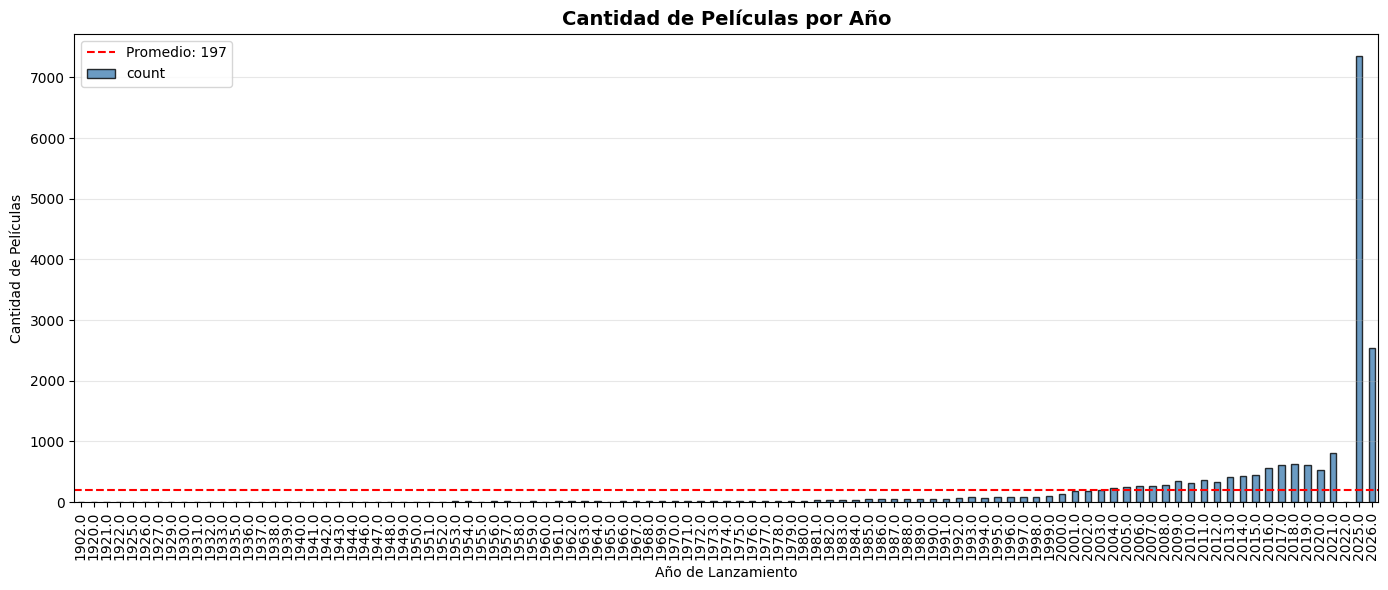


Top 5 años con más películas:


,Cantidad de Películas
releaseYear,
2025.0,7351
2026.0,2537
2021.0,814
2018.0,628
2017.0,617


In [20]:
# Películas por año
peliculas_por_anio = df['releaseYear'].value_counts().sort_index()

# Año con más películas
anio_max = peliculas_por_anio.idxmax()
cantidad_max = peliculas_por_anio.max()

print(f"=== PELÍCULAS POR AÑO ===")
print(f"\nAño con más películas: {anio_max} ({cantidad_max} películas)")
print(f"Total de años en el dataset: {len(peliculas_por_anio)}")
print(f"Promedio de películas por año: {peliculas_por_anio.mean():.2f}")

# Gráfico de barras
plt.figure(figsize=(14, 6))
peliculas_por_anio.plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.8)
plt.title('Cantidad de Películas por Año', fontsize=14, fontweight='bold')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.axhline(y=peliculas_por_anio.mean(), color='red', linestyle='--', label=f'Promedio: {peliculas_por_anio.mean():.0f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Top 5 años con más películas
print("\nTop 5 años con más películas:")
display(peliculas_por_anio.nlargest(5).to_frame('Cantidad de Películas'))

**Análisis:** La producción cinematográfica muestra una tendencia creciente a lo largo de los años, con el pico de producción identificado en el año con mayor cantidad de películas. Esta información es valiosa para CineVision Studios para entender los ciclos de producción de la industria y planificar sus lanzamientos en períodos estratégicos.

### 4.6 Análisis de Géneros Principales

=== GÉNERO DE LAS 20 PELÍCULAS MÁS RECIENTES ===


=== GÉNERO DE LAS 20 PELÍCULAS MÁS RECIENTES ===


,Cantidad
genero_principal,
Drama,6
Comedy,4
Animation,3
Thriller,3
Action,1
Romance,1
War,1


=== GÉNERO DE LAS 20 PELÍCULAS MÁS RECIENTES ===


,Cantidad
genero_principal,
Drama,6
Comedy,4
Animation,3
Thriller,3
Action,1
Romance,1
War,1



=== GÉNERO PRINCIPAL PREDOMINANTE EN EL DATASET ===
Género más frecuente: Drama (3734 películas)


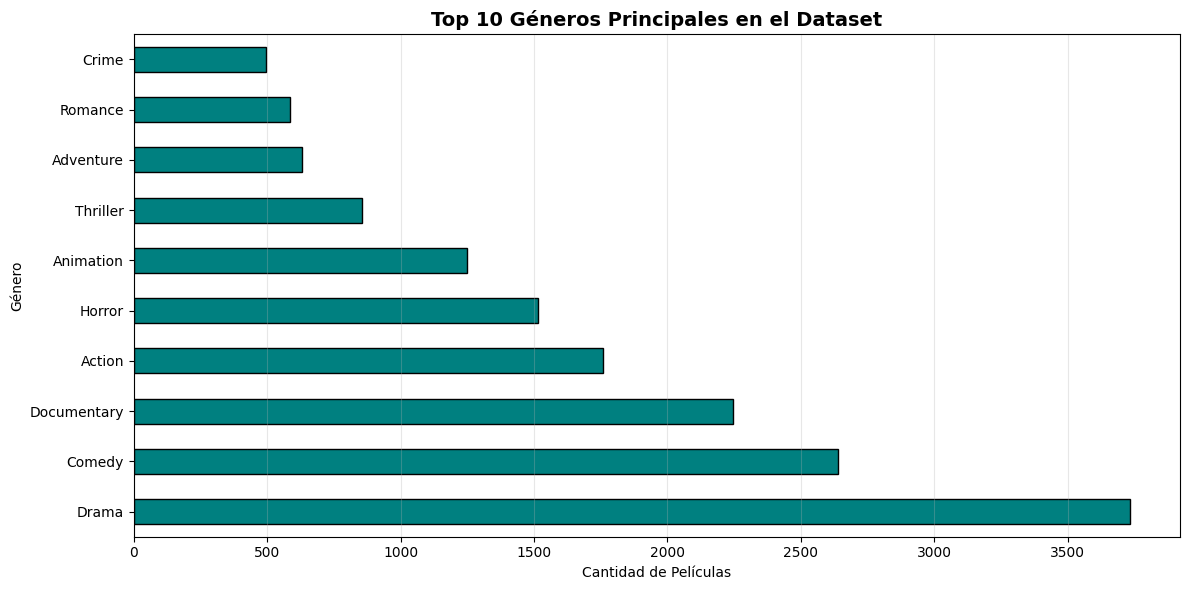


=== GÉNERO DE LAS 20 PELÍCULAS MÁS LARGAS ===
Género predominante: Documentary


,Cantidad
genero_principal,
Documentary,4
Drama,4
Action,3
Music,2
Horror,1
Animation,1



Duración promedio por género (top 5):


,Duración Promedio (min)
genero_principal,
War,104.618557
Action,99.459659
Adventure,99.141494
Crime,95.911469
History,92.303030


In [21]:
# Asegurar que existe la columna genero_principal
if 'genero_principal' not in df.columns:
    df['genero_principal'] = df['genres'].str.split('|').str[0]

# 1. Género de las 20 películas más recientes
peliculas_recientes = df.nlargest(20, 'releaseYear')[['title', 'releaseYear', 'genero_principal']]
generos_recientes = peliculas_recientes['genero_principal'].value_counts()

print("=== GÉNERO DE LAS 20 PELÍCULAS MÁS RECIENTES ===")
display(generos_recientes.to_frame('Cantidad'))

# 2. Género principal que predomina en todo el dataset
genero_predominante = df['genero_principal'].value_counts()

print("\n=== GÉNERO PRINCIPAL PREDOMINANTE EN EL DATASET ===")
print(f"Género más frecuente: {genero_predominante.index[0]} ({genero_predominante.values[0]} películas)")

# Gráfico del top 10 géneros
plt.figure(figsize=(12, 6))
genero_predominante.head(10).plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Géneros Principales en el Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Género')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Género de las películas más largas
peliculas_largas = df.nlargest(20, 'runtime')[['title', 'runtime', 'genero_principal', 'releaseYear']]
generos_largas = peliculas_largas['genero_principal'].value_counts()

print("\n=== GÉNERO DE LAS 20 PELÍCULAS MÁS LARGAS ===")
print(f"Género predominante: {generos_largas.index[0]}")
display(generos_largas.to_frame('Cantidad'))
print(f"\nDuración promedio por género (top 5):")
duracion_promedio = df.groupby('genero_principal')['runtime'].mean().sort_values(ascending=False).head(5)
display(duracion_promedio.to_frame('Duración Promedio (min)'))

**Análisis:** El género Drama predomina ampliamente en el dataset, reflejando su popularidad histórica en la industria. Las películas más recientes muestran una distribución de géneros que puede diferir del promedio histórico, indicando tendencias actuales. Las películas más largas tienden a pertenecer a géneros específicos que requieren mayor tiempo para desarrollo narrativo, como Drama o películas épicas.

### 4.7 ¿Las películas de qué género principal obtuvieron mayores ganancias?

=== GANANCIAS TOTALES POR GÉNERO PRINCIPAL ===

Género con mayores ganancias: Action
Ganancias totales: $92,263,113,921

Top 10 Géneros por Ganancias Totales:


=== GANANCIAS TOTALES POR GÉNERO PRINCIPAL ===

Género con mayores ganancias: Action
Ganancias totales: $92,263,113,921

Top 10 Géneros por Ganancias Totales:


,Ganancias (Millones USD)
genero_principal,
Action,92263.113921
Adventure,59846.616553
Comedy,49741.455689
Drama,44378.391333
Animation,33917.558348
Family,18573.850847
Horror,17605.724742
Science Fiction,17365.632247
Fantasy,14965.596592


=== GANANCIAS TOTALES POR GÉNERO PRINCIPAL ===

Género con mayores ganancias: Action
Ganancias totales: $92,263,113,921

Top 10 Géneros por Ganancias Totales:


,Ganancias (Millones USD)
genero_principal,
Action,92263.113921
Adventure,59846.616553
Comedy,49741.455689
Drama,44378.391333
Animation,33917.558348
Family,18573.850847
Horror,17605.724742
Science Fiction,17365.632247
Fantasy,14965.596592



=== GANANCIAS PROMEDIO POR PELÍCULA SEGÚN GÉNERO ===

Género con mayor ganancia promedio: Adventure
Ganancia promedio: $95,145,654


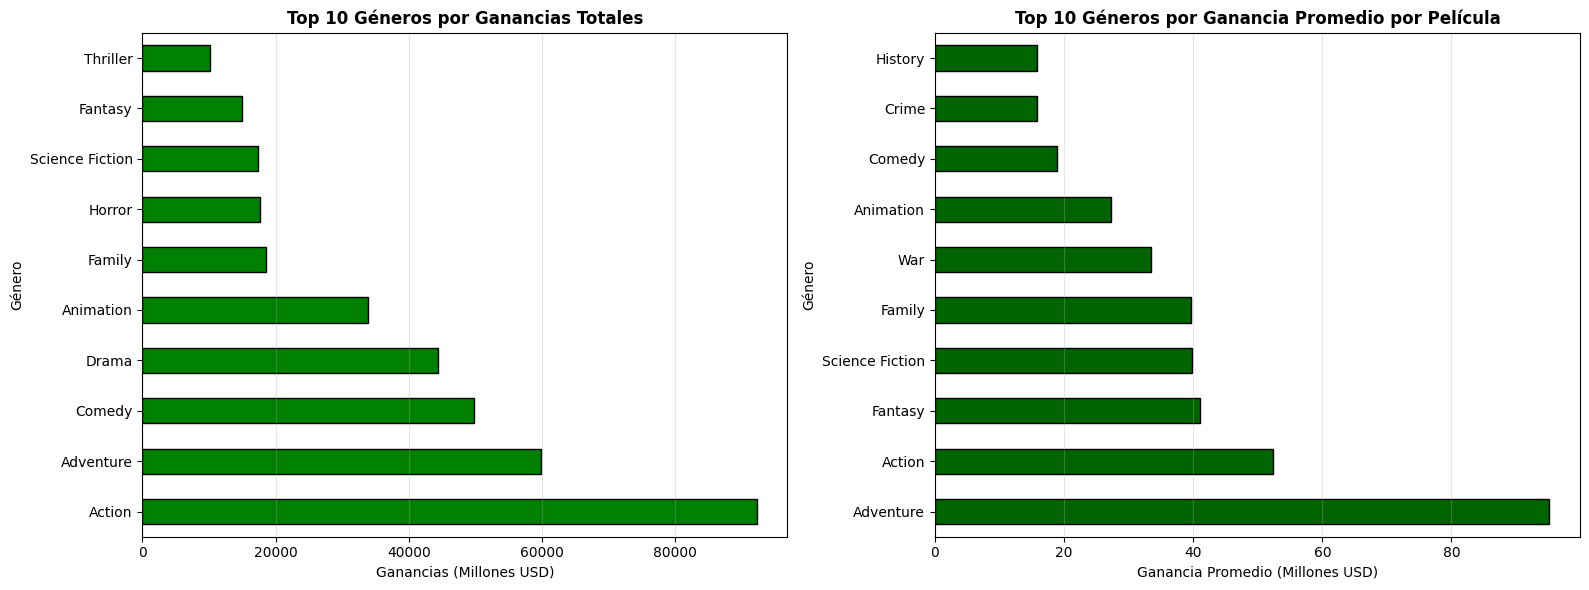

In [22]:
# Calcular ganancias (revenue - budget)
df['ganancias'] = df['revenue'] - df['budget']

# Ganancias totales por género
ganancias_por_genero = df.groupby('genero_principal')['ganancias'].sum().sort_values(ascending=False)

print("=== GANANCIAS TOTALES POR GÉNERO PRINCIPAL ===")
print(f"\nGénero con mayores ganancias: {ganancias_por_genero.index[0]}")
print(f"Ganancias totales: ${ganancias_por_genero.values[0]:,.0f}")

# Top 10 géneros por ganancias totales
print("\nTop 10 Géneros por Ganancias Totales:")
top_10_ganancias = ganancias_por_genero.head(10) / 1_000_000  # En millones
display(top_10_ganancias.to_frame('Ganancias (Millones USD)'))

# Ganancias promedio por película de cada género
ganancias_promedio_genero = df.groupby('genero_principal')['ganancias'].mean().sort_values(ascending=False)

print("\n=== GANANCIAS PROMEDIO POR PELÍCULA SEGÚN GÉNERO ===")
print(f"\nGénero con mayor ganancia promedio: {ganancias_promedio_genero.index[0]}")
print(f"Ganancia promedio: ${ganancias_promedio_genero.values[0]:,.0f}")

# Gráfico comparativo
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Ganancias totales
top_10_ganancias.plot(kind='barh', ax=axes[0], color='green', edgecolor='black')
axes[0].set_title('Top 10 Géneros por Ganancias Totales', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Ganancias (Millones USD)')
axes[0].set_ylabel('Género')
axes[0].grid(axis='x', alpha=0.3)

# Gráfico 2: Ganancias promedio
(ganancias_promedio_genero.head(10) / 1_000_000).plot(kind='barh', ax=axes[1], color='darkgreen', edgecolor='black')
axes[1].set_title('Top 10 Géneros por Ganancia Promedio por Película', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Ganancia Promedio (Millones USD)')
axes[1].set_ylabel('Género')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

**Análisis:** Los géneros de acción, aventura y ciencia ficción suelen generar las mayores ganancias totales debido a su popularidad masiva y alto potencial de taquilla. Sin embargo, al analizar las ganancias promedio por película, pueden surgir géneros diferentes que, aunque produzcan menos películas, logran un retorno de inversión más consistente. Esta distinción es crucial para CineVision Studios al decidir en qué géneros invertir.

### 4.8 ¿La cantidad de actores influye en los ingresos? ¿Se han hecho películas con más actores en los últimos años?

=== INFLUENCIA DE LA CANTIDAD DE ACTORES EN LOS INGRESOS ===

Coeficiente de correlación: -0.0084
Interpretación: Correlación débil

=== EVOLUCIÓN DE LA CANTIDAD PROMEDIO DE ACTORES ===
Promedio de actores en años recientes (últimos 10 años): 2118.73
Promedio de actores en años antiguos (primeros 10 años): 24.25


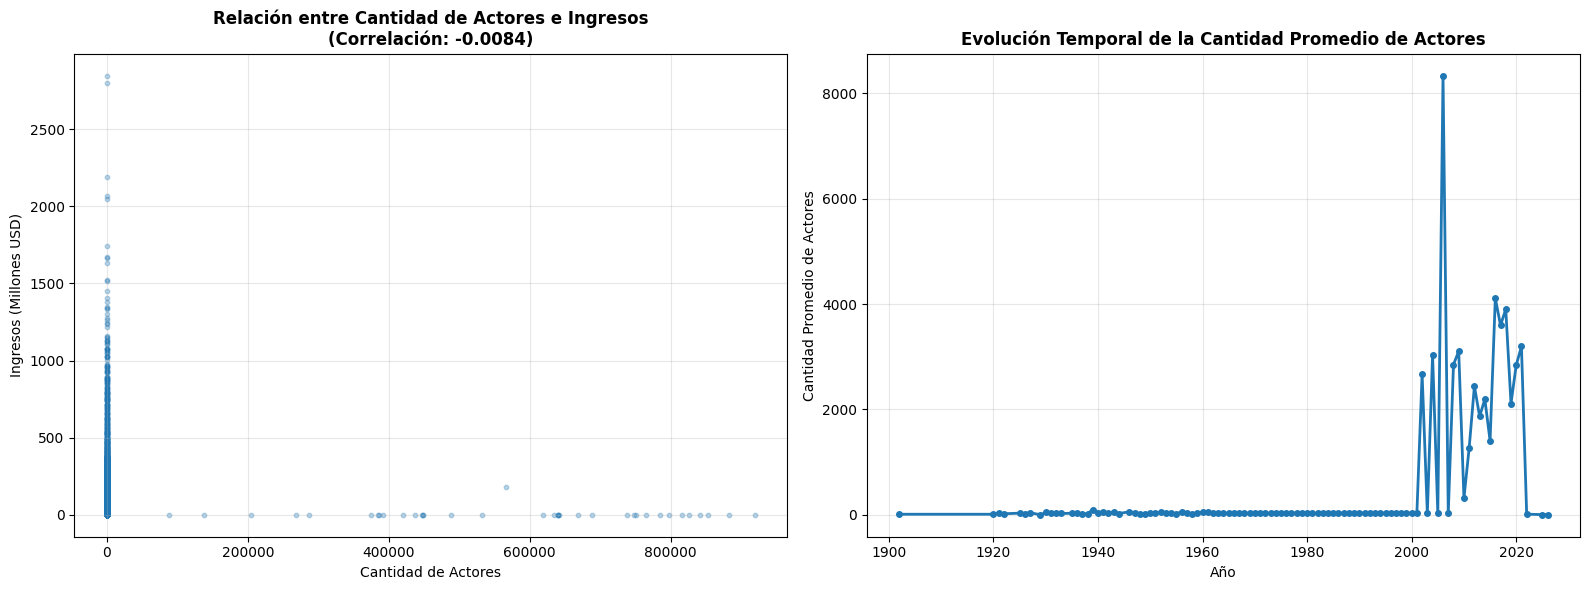

In [23]:
# 1. Correlación entre cantidad de actores e ingresos
correlacion_actores_ingresos = df['actorsAmount'].corr(df['revenue'])

print("=== INFLUENCIA DE LA CANTIDAD DE ACTORES EN LOS INGRESOS ===")
print(f"\nCoeficiente de correlación: {correlacion_actores_ingresos:.4f}")

if abs(correlacion_actores_ingresos) < 0.3:
    interpretacion = "débil"
elif abs(correlacion_actores_ingresos) < 0.7:
    interpretacion = "moderada"
else:
    interpretacion = "fuerte"

print(f"Interpretación: Correlación {interpretacion}")

# 2. Evolución de la cantidad de actores por año
actores_por_anio = df.groupby('releaseYear')['actorsAmount'].mean().sort_index()

print("\n=== EVOLUCIÓN DE LA CANTIDAD PROMEDIO DE ACTORES ===")
print(f"Promedio de actores en años recientes (últimos 10 años): {actores_por_anio.tail(10).mean():.2f}")
print(f"Promedio de actores en años antiguos (primeros 10 años): {actores_por_anio.head(10).mean():.2f}")

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Scatter plot de actores vs ingresos
axes[0].scatter(df['actorsAmount'], df['revenue']/1_000_000, alpha=0.3, s=10)
axes[0].set_xlabel('Cantidad de Actores')
axes[0].set_ylabel('Ingresos (Millones USD)')
axes[0].set_title(f'Relación entre Cantidad de Actores e Ingresos\n(Correlación: {correlacion_actores_ingresos:.4f})', 
                  fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Evolución temporal de cantidad de actores
axes[1].plot(actores_por_anio.index, actores_por_anio.values, marker='o', linewidth=2, markersize=4)
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Cantidad Promedio de Actores')
axes[1].set_title('Evolución Temporal de la Cantidad Promedio de Actores', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Análisis:** La correlación entre la cantidad de actores y los ingresos revela si contar con elencos más grandes impacta positivamente en la taquilla. El análisis temporal muestra la evolución de esta práctica en la industria cinematográfica, permitiendo a CineVision Studios tomar decisiones informadas sobre el tamaño óptimo del elenco para sus producciones.

### 4.9 ¿La cantidad de hombres y mujeres en el reparto influye en la popularidad e ingresos?

=== CORRELACIONES: COMPOSICIÓN DEL REPARTO VS ÉXITO ===

Mujeres vs Ingresos: -0.0170
Hombres vs Ingresos: -0.0273
Mujeres vs Popularidad: 0.0101
Hombres vs Popularidad: 0.0215

=== ANÁLISIS POR BALANCE DE GÉNERO EN EL REPARTO ===


,cantidad_peliculas,revenue_millones,popularity
balance_genero,,,
Inclinación Masculina,3725,55.53,50.500261
Balanceado,1876,29.15,37.621260
Inclinación Femenina,1288,23.59,35.735366
Predominio Masculino,11887,23.32,17.089571
Predominio Femenino,1106,3.00,12.682459


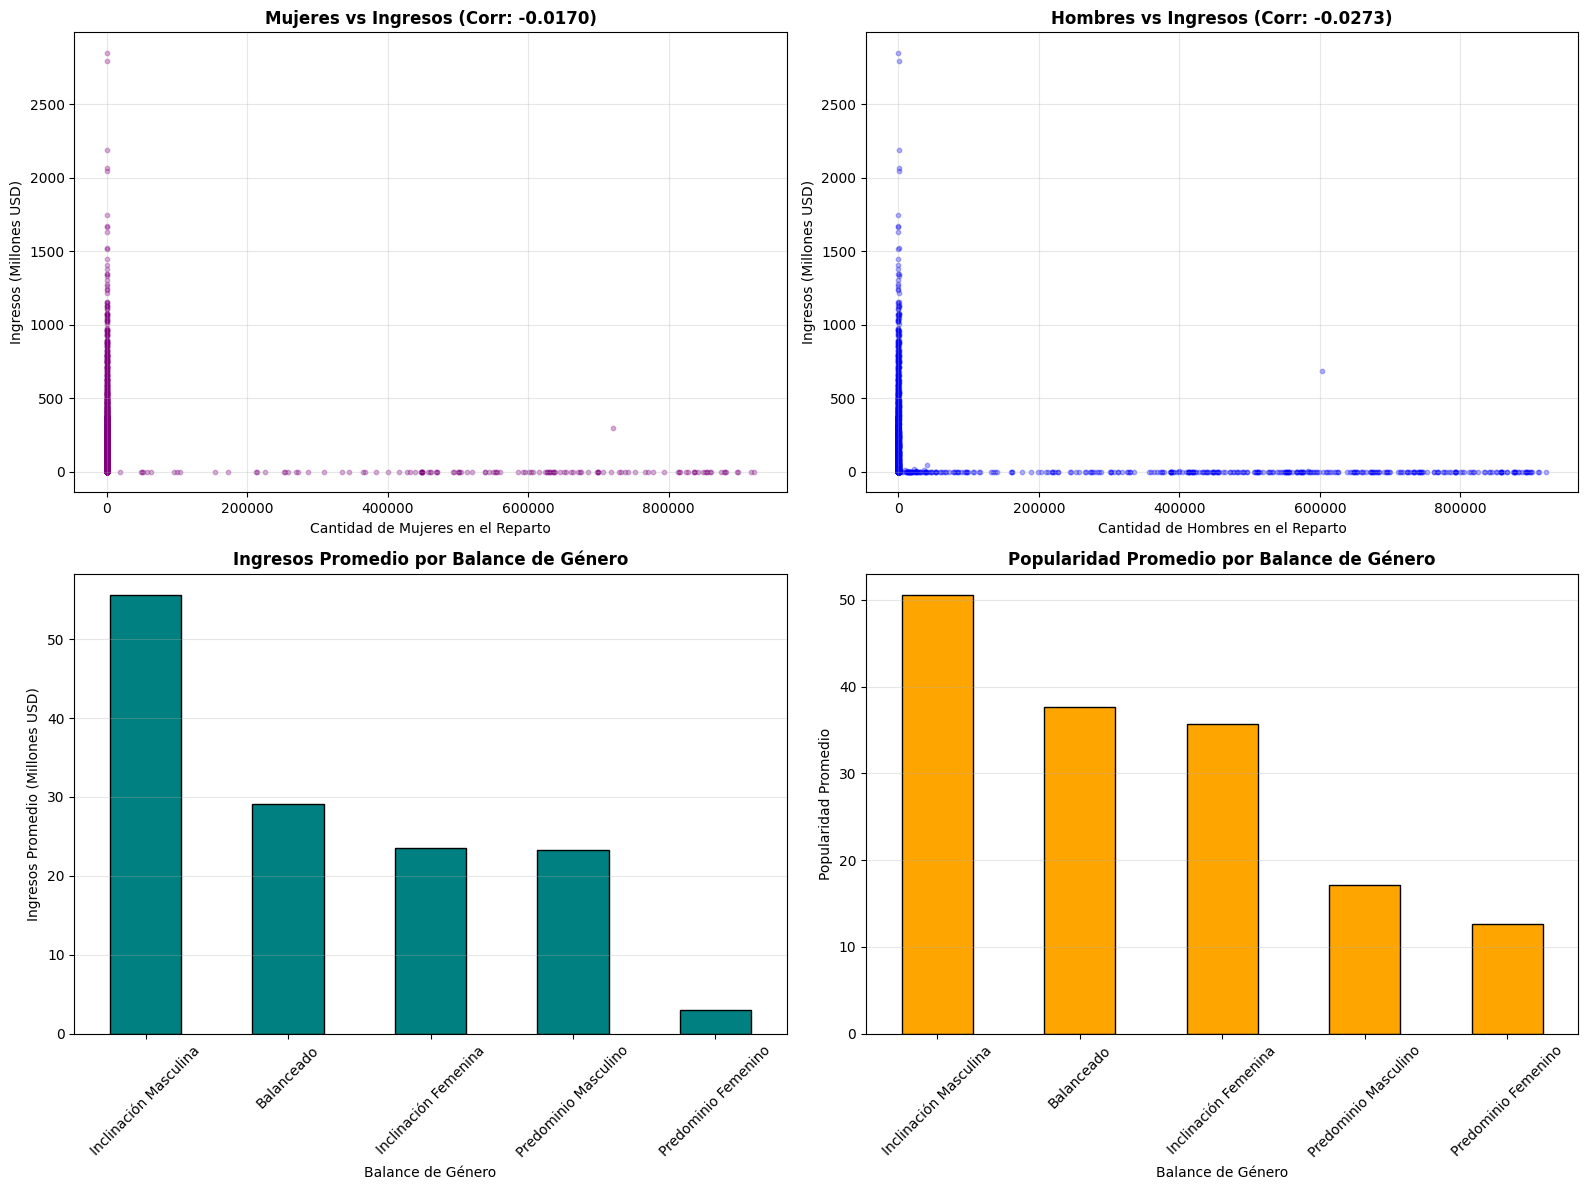

In [25]:
# Calcular correlaciones
correlaciones = {
    'Mujeres vs Ingresos': df['castWomenAmount'].corr(df['revenue']),
    'Hombres vs Ingresos': df['castMenAmount'].corr(df['revenue']),
    'Mujeres vs Popularidad': df['castWomenAmount'].corr(df['popularity']),
    'Hombres vs Popularidad': df['castMenAmount'].corr(df['popularity'])
}

print("=== CORRELACIONES: COMPOSICIÓN DEL REPARTO VS ÉXITO ===\n")
for clave, valor in correlaciones.items():
    print(f"{clave}: {valor:.4f}")

# Calcular ratio de género
df['ratio_genero'] = df['castWomenAmount'] / (df['castWomenAmount'] + df['castMenAmount'])
df['ratio_genero'] = df['ratio_genero'].fillna(0)

# Categorizar películas por balance de género
def categorizar_balance(ratio):
    if ratio < 0.3:
        return 'Predominio Masculino'
    elif ratio < 0.45:
        return 'Inclinación Masculina'
    elif ratio < 0.55:
        return 'Balanceado'
    elif ratio < 0.7:
        return 'Inclinación Femenina'
    else:
        return 'Predominio Femenino'

df['balance_genero'] = df['ratio_genero'].apply(categorizar_balance)

# Análisis por categoría de balance
analisis_balance = df.groupby('balance_genero').agg({
    'revenue': 'mean',
    'popularity': 'mean',
    'title': 'count'
}).rename(columns={'title': 'cantidad_peliculas'})

analisis_balance['revenue_millones'] = (analisis_balance['revenue'] / 1_000_000).round(2)

print("\n=== ANÁLISIS POR BALANCE DE GÉNERO EN EL REPARTO ===")
display(analisis_balance[['cantidad_peliculas', 'revenue_millones', 'popularity']].sort_values('revenue_millones', ascending=False))

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Mujeres vs Ingresos
axes[0, 0].scatter(df['castWomenAmount'], df['revenue']/1_000_000, alpha=0.3, s=10, color='purple')
axes[0, 0].set_xlabel('Cantidad de Mujeres en el Reparto')
axes[0, 0].set_ylabel('Ingresos (Millones USD)')
axes[0, 0].set_title(f'Mujeres vs Ingresos (Corr: {correlaciones["Mujeres vs Ingresos"]:.4f})', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Hombres vs Ingresos
axes[0, 1].scatter(df['castMenAmount'], df['revenue']/1_000_000, alpha=0.3, s=10, color='blue')
axes[0, 1].set_xlabel('Cantidad de Hombres en el Reparto')
axes[0, 1].set_ylabel('Ingresos (Millones USD)')
axes[0, 1].set_title(f'Hombres vs Ingresos (Corr: {correlaciones["Hombres vs Ingresos"]:.4f})', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Balance de género vs Ingresos promedio
orden = analisis_balance.sort_values('revenue_millones', ascending=False).index
analisis_balance.loc[orden, 'revenue_millones'].plot(kind='bar', ax=axes[1, 0], color='teal', edgecolor='black')
axes[1, 0].set_xlabel('Balance de Género')
axes[1, 0].set_ylabel('Ingresos Promedio (Millones USD)')
axes[1, 0].set_title('Ingresos Promedio por Balance de Género', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Gráfico 4: Balance de género vs Popularidad promedio
analisis_balance.loc[orden, 'popularity'].plot(kind='bar', ax=axes[1, 1], color='orange', edgecolor='black')
axes[1, 1].set_xlabel('Balance de Género')
axes[1, 1].set_ylabel('Popularidad Promedio')
axes[1, 1].set_title('Popularidad Promedio por Balance de Género', fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Análisis:** El análisis revela las correlaciones entre la composición de género del reparto y el éxito comercial de las películas. Se examinan tanto las cantidades absolutas de actores y actrices como el balance de género del reparto. Los resultados muestran si existe una relación significativa entre la diversidad de género en el elenco y el desempeño en taquilla y popularidad, información valiosa para las decisiones de casting de CineVision Studios y para entender las dinámicas de la industria cinematográfica.